###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'style/custom.css'
HTML(open(css_file, "r").read())

# Fourier Series Expansion

The time-dependent function $x(t)$ can be expanded into a **Fourier series**:

\begin{equation}
x(t) = \frac{\color{blue}{a_0}}{2} + \sum_{n=1}^{\infty} \biggl\{\color{blue}{a_n} cos(2 \pi n f_0 t) + \color{red}{b_n} sin(2 \pi n f_0 t) \biggr\} \notag
\end{equation}

with the **expansion coefficients**

\begin{equation}
\color{blue}{a_n = \frac{2}{T} \int_0^T dt\; x(t)\; cos(2 \pi n f_0 t)} \notag
\end{equation}

and 

\begin{equation}
\color{red}{b_n = \frac{2}{T} \int_0^T dt\; x(t)\; sin(2 \pi n f_0 t)} \notag
\end{equation}

- $T$ = fundamental period
- $f_0$ = $1/T$ = fundamental frequency

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## Fourier series expansion of rectangular function

Let's start with a simple example by approximating the rectangular function by a discrete Fourier series expansion

In [3]:
# Define parameters
tmax = 5.       # length of seismogram (s)
nt = 3000       # number of time samples
dt = tmax/nt    # time increment

In [4]:
# Define time vector, fundamental period T and frequency f0
time = np.arange(0,tmax,dt)
T = time[-1]
f0 = 1/T

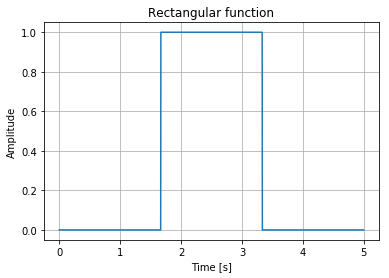

In [5]:
# Define rectangular function
x = np.zeros(nt)      # initialization x(t) with zeros
x[1000:2000] = 1.0    # add rectangular function

# Plotting rectangular function
plt.plot(time, x)
plt.title("Rectangular function" )
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [6]:
# Calculate Fourier series approximation
# --------------------------------------
def fourier_series_app(x, time, N):
    
    '''
    fourier_series_app:
    x = time series to approximate by Fourier series expansion
    time = time array
    N = maximum Fourier series expansion up to term N
    '''

    # Calculate expansion coefficients
    # --------------------------------
    an = np.zeros(N+1)
    bn = np.zeros(N+1)

    # Compute an[0] term
    an[0] = (2/T) * integrate.simps(x, time)

    for i in range (1,N+1):

        # Define sine and cos-terms
        cos_term = np.cos(2*np.pi*f0*time*i)
        sin_term = np.sin(2*np.pi*f0*time*i)

        # Compute Fourier series expansion coefficients for n > 0
        an[i] = (2/T) * integrate.simps(x * cos_term, time) 
        bn[i] = (2/T) * integrate.simps(x * sin_term, time)

    # Calculate Fourier series approximation of rectangular function
    # --------------------------------------------------------------
    x_f = np.zeros(nt)

    # expansion term n=0
    x_f += an[0]/2 

    # loop over expansion terms n>0
    for i in range (1,N+1):

        # Define sine and cos-terms
        cos_term = np.cos(2*np.pi*f0*time*i)
        sin_term = np.sin(2*np.pi*f0*time*i)

        x_f += an[i] * cos_term
        x_f += bn[i] * sin_term

    # Plotting rectangular function and Fourier expansion approximation
    plt.plot(time, x, label="True function")
    plt.plot(time, x_f, label="Fourier series approximation (N = " + str(N) + ")")
    plt.title("Function approximation by Fourier series")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()    

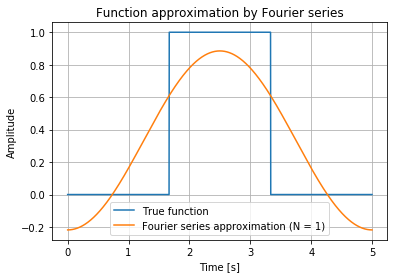

In [7]:
N = 1         # expand Fourier series up to term N
fourier_series_app(x, time, N)

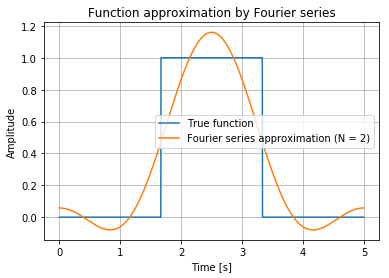

In [8]:
N = 2         # expand Fourier series up to term N
fourier_series_app(x, time, N)

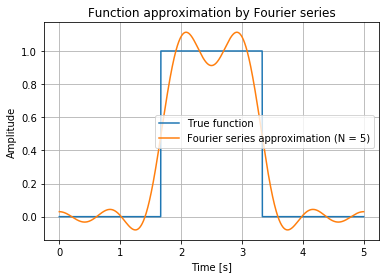

In [9]:
N = 5         # expand Fourier series up to term N
fourier_series_app(x, time, N)

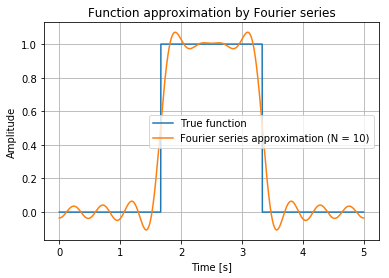

In [10]:
N = 10         # expand Fourier series up to term N
fourier_series_app(x, time, N)

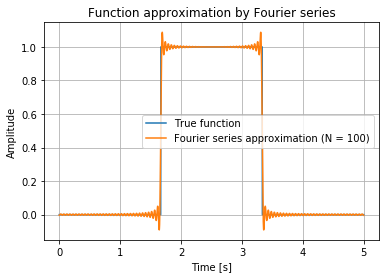

In [11]:
N = 100         # expand Fourier series up to term N
fourier_series_app(x, time, N)

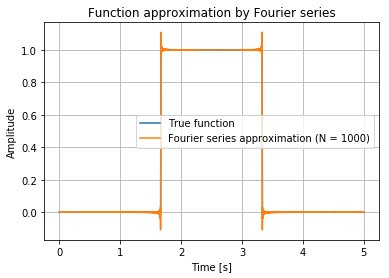

In [12]:
N = 1000       # expand Fourier series up to term N
fourier_series_app(x, time, N)

Notice the ringing artifacts occuring at the discontinuities known as **Gibbs phenomenon**

## Fourier series expansion of seismogram

The simple rectangular example shows the basics of Fourier series expansion and the influence of Gibbs phenomenon of the function approximation at discontinuities. In the next example, we calculate the Fourier series expansion of a complex seismogram

In [13]:
# load seismogram from ASCII file
seis = np.loadtxt('marmousi_shot1_y_trace_95_fmax_2p5_Hz.seis', skiprows=0, unpack='False')

# define sampling interval dt [s] and time array
dt = 2.0e-3
tmax = nt *dt
time_seis = np.arange(0,tmax,dt)

T = time_seis[-1]
f0 = 1/T

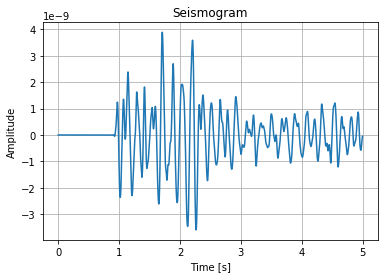

In [14]:
# Plot seismogram
plt.plot(time, seis)
plt.title("Seismogram" )
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

After importing the seismogram, we can expand it into a Fourier series

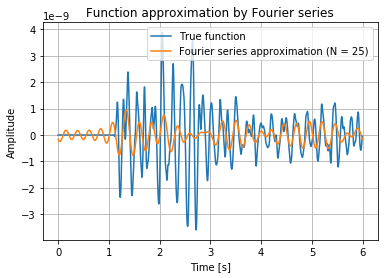

In [15]:
N = 25       # expand Fourier series up to term N
fourier_series_app(seis, time_seis, N)

25 expansion terms seem to be not enough, let's try 50 ...

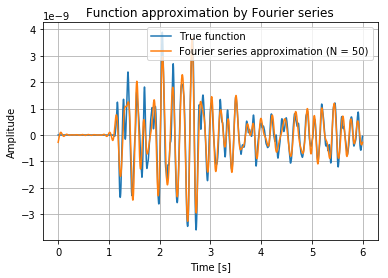

In [16]:
N = 50       # expand Fourier series up to term N
fourier_series_app(seis, time_seis, N)

... or 100 ...

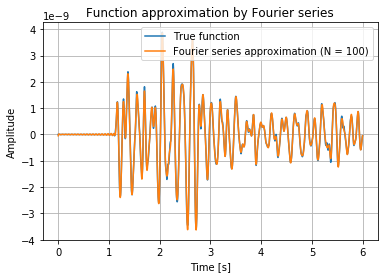

In [17]:
N = 100       # expand Fourier series up to term N
fourier_series_app(seis, time_seis, N)

... or 200 ...

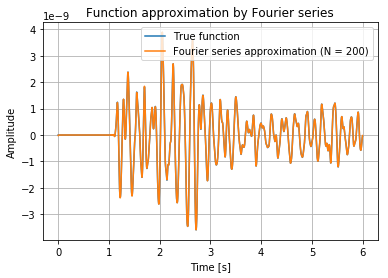

In [18]:
N = 200       # expand Fourier series up to term N
fourier_series_app(seis, time_seis, N)

## We learned:

* How to compute Fourier series expansion for rectangular function
* Introduction of Gibbs phenomenon
* Fourier series expansion of a seismogram